# Proyek Analisis Data: Nama dataset
- Nama: Shafira Faira Huwaida
- Email: shafirafaira.2019@student.uny.ac.id
- Id Dicoding: shaf_faira

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
Bagaimana persebaran customer di wilayah Brasil?

- pertanyaan 2
Bagaimana penilaian customers berdasarkan review score?

## Menyaipkan semua library yang dibuthkan

In [21]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium

## Data Wrangling

### Gathering Data

In [22]:
customers_dataset = pd.read_csv('customer_geolocation.csv')

order_reviews_dataset =  pd.read_csv('order_reviews_dataset.csv')
customers_data = pd.read_csv('customers_dataset.csv')
geolocation_dataset = pd.read_csv('geolocation_dataset.csv')

In [23]:
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073


In [24]:
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [25]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073


In [26]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

In [27]:
# Sample customer data with latitude and longitude
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  int64  
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   geolocation_lat           99163 non-null  float64
 6   geolocation_lng           99163 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.3+ MB


### Cleaning Data

In [28]:
customer_data.isna().sum()

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
geolocation_lat             278
geolocation_lng             278
dtype: int64

In [29]:
customer_data = customer_data.dropna()
customer_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614


## Exploratory Data Analysis (EDA)

In [30]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99163 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99163 non-null  object 
 1   customer_unique_id        99163 non-null  object 
 2   customer_zip_code_prefix  99163 non-null  int64  
 3   customer_city             99163 non-null  object 
 4   customer_state            99163 non-null  object 
 5   geolocation_lat           99163 non-null  float64
 6   geolocation_lng           99163 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


In [31]:
#customer_data.to_csv('uhuy.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran customer di wilayah Brasil?

In [32]:
ritel_x = customer_data.iloc[:, 5:7]
ritel_x.head()

,geolocation_lat,geolocation_lng
0,-20.509898,-47.397866
1,-23.726853,-46.545746
2,-23.527788,-46.660310
3,-23.496930,-46.185352
4,-22.987222,-47.151073


In [33]:
BBox = ((customer_data.geolocation_lng.min(),   customer_data.geolocation_lng.max(),      
         customer_data.geolocation_lat.min(), customer_data.geolocation_lat.max()))
BBox

(-72.66670555, -8.577855018, -36.60537441, 42.18400274)

In [34]:
brazil = plt.imread("brazil.png")

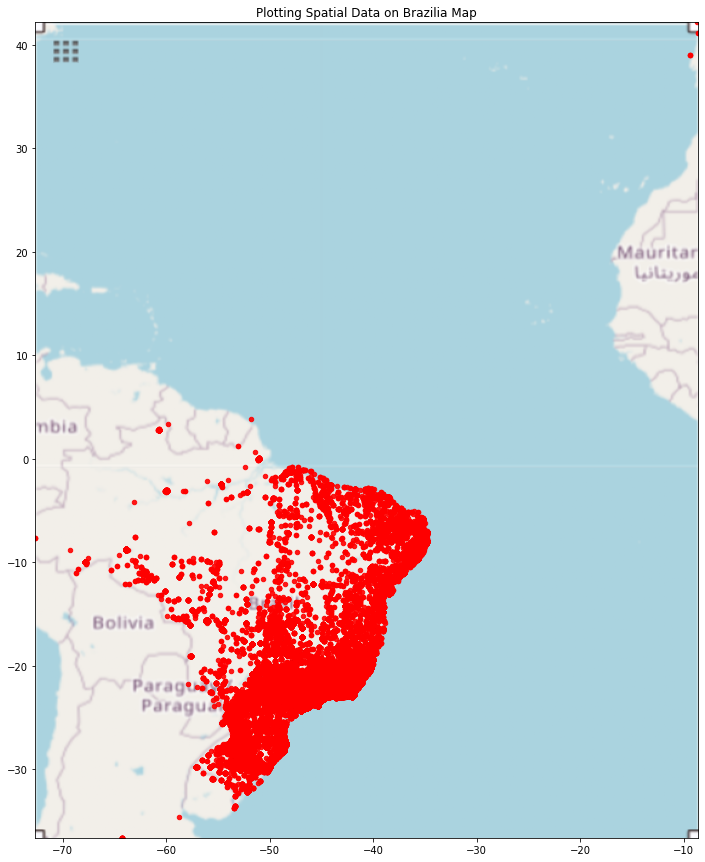

In [35]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(customer_data.geolocation_lng, customer_data.geolocation_lat, zorder=1, alpha= 0.9, c='r', s=20)
ax.set_title('Plotting Spatial Data on Brazilia Map')
ax.set_xlim(-72.66670555,-8.577855018)
ax.set_ylim(-36.60537441, 42.18400274)
ax.imshow(brazil, zorder=0, extent = BBox, aspect= 'equal')

### Pertanyaan 2: Bagaimana penilaian customers berdasarkan review score?

C:\Users\Asus\AppData\Local\Temp\ipykernel_16780\799613159.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=x, ax=ax, palette=palette)


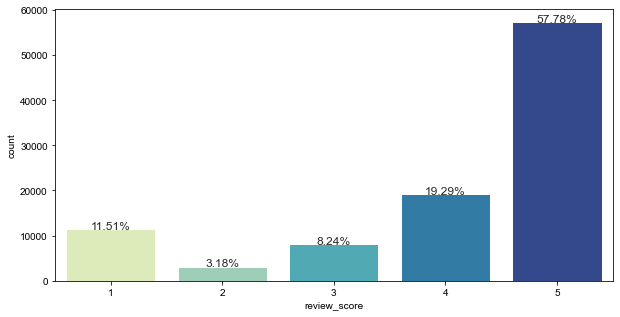

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def single_countplot(data, x, ax=None, palette=None):
    sns.set(style="whitegrid")
    ax = sns.countplot(data=data, x=x, ax=ax, palette=palette)

    # Adding percentages
    total = len(data[x])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                '{:.2%}'.format(height / total),
                ha="center")

fig, ax = plt.subplots(figsize=(10, 5))
single_countplot(data=order_reviews_dataset, x='review_score', ax=ax, palette='YlGnBu')

plt.show()


## Conclusion

- Conclution pertanyaan 1
Plot menunjukkan bahwa persebaran customers pada wilayah Brasil di dominasi dari wilayah pesisir.

- conclution pertanyaan 2
Plot menunjukkan bahwa penilaian customers mayoritas menunjukkan nilai 5 sebesar 57,78% yang menunjukkan bahwa review cenderung ke arah positif.